# Lab 4 Project (Titanic)
Jason Ballard
4 April 2025

Import the external Python libraries used (e.g., pandas, numpy, matplotlib, seaborn, sklearn and more).

## Section 1. Import and Inspect the Data

In [ ]:
# all imports get moved to the top - import each only once
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Version:", sklearn.__version__)
print("Location:", sklearn.__file__)

Version: 1.6.1
Location: c:\Users\balla\Projects\applied-ml-jballard\.venv\Lib\site-packages\sklearn\__init__.py


In [2]:
# Create folder if it doesn't exist
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

In [3]:
# Load Titanic dataset
df = sns.load_dataset('titanic')
print(df.head())
print(df.info())

features = list(df.columns)
print(features)
print(len(features))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

# Section 2. Data Exploration and Preparation

In [4]:
df['age'] = df['age'].fillna(df['age'].median())

df['survived'] = df['survived'].fillna(df['survived'].median())

titanic = df.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

<!-- ### Reflection 2.1:

1. What patterns or anomalies do you notice? Young to middle age passengers, majority found in third class
2. Do any features stand out as potential predictors? the deck location or fare price
3. Are there any visible class imbalances? There are huge class imbalances. Majority of the passengers where younger families traveling to the USA -->

## 2.1 Handle Missing Values and Clean Data

In [5]:
# Impute missing values in 'age' with the median age
df['age'].fillna(df['age'].median())

# Fill missing values in 'survived' with the median age
df['survived'].fillna(df['survived'].median())

# Impute missing values in 'fare' with the mode (most common value)
mode_val = df['fare'].mode()
if not mode_val.empty:
    df['fare'].fillna(mode_val[0])
else:
    print("No mode found for 'fare'")


## 2.2 Feature Engineering

In [6]:
# Create a new feature 'family_size' (sum of siblings/spouses and parents/children aboard)
df['family_size'] = df['sibsp'] + df['parch'] + 1  # +1 to include the passenger themselves

<!-- ### Reflection 2.3

1. Why might family size be a useful feature for predicting survival? famil;y size is a good prediction of survivalbility for the female and younger children of the families
2. Why convert categorical data to numeric?  the conversion allows computations to be run on the data. -->

# Section 3. Feature Selection and Justification

- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Use 'Survived' as the target

First:
- input features: age
- target: fare

Second:
- input features - family size
- target: fare

Third:
- input features -  age, family_size
- target: fare

Fourth: 
- input feature - pclass
- target - fare


## 3.1 Choose features and target

In [7]:
# Select relevant features for classification
features = ['age', 'family_size', 'pclass']
target = 'fare'

# Extract relevant columns
titanic_classification = df[features + [target]]

# Drop rows with missing values
titanic_classification = titanic_classification.dropna()

# Display the processed dataset
print(titanic_classification.head())

    age  family_size  pclass     fare
0  22.0            2       3   7.2500
1  38.0            2       1  71.2833
2  26.0            1       3   7.9250
3  35.0            2       1  53.1000
4  35.0            1       3   8.0500


## 3.2 Define X (features) and y (target)
- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time

- The follow starts with only the statements needed for case 1. 
- Double brackets [[ ]]  makes a 2D DataFrame
- Single brackets [ ]  make a 1D Series

In [8]:
# Case 1 Assign input features to X = (alone)
X1 = df[['age']]
# Assign target variable to y (as applicable)
y1 = df['fare']

In [9]:
# Case 2 Assign input features to X = embarked
X2 = df[['family_size']]
# Assign target variable to y (as applicable)   
y2 = df['fare']

In [10]:
#  Case 3 Assign input features to X = 
X3 = df[['age', 'family_size']]
# Assign target variable to y (as applicable)
y3 = df['fare']

In [22]:
#  Case 4 Assign input features to X = 
X4 = df[['age', 'family_size','pclass']]
# Assign target variable to y (as applicable)
y4 = df['fare']

### Reflection 3:

**Why might these features affect a passenger’s fare:** Features like pclass, age, and family_size make sense because they reflect how much comfort or space a passenger might need. People in first class paid more, younger passengers or families may have gotten discounts, and large families might’ve booked cheaper group tickets.

**List all available features:** survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'

**Which other features could improve predictions and why:** sex, embarked, and deck could be helpful. For example, deck could show how fancy a cabin was, and that might link to fare. sex might also reflect who got access to better accommodations or family packages.

**How many variables are in your Case 4:** Three — pclass, age, and family_size.

**Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:** I chose pclass, age, and family_size because they cover a mix of socioeconomic status (class), personal characteristics (age), and travel group size. Together, they help the model better understand fare differences between passengers.


# Section 4. Train a Classification Model (Decision Tree)

## 4.1 Basic Train/Test split 

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

## 4.2 Train/Test split

In [24]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

## 4.3 Compare Results


In [25]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test MAE:", mean_absolute_error(y1_test, y_pred_test4))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 1441.8455811188421
Case 1: Test MAE: 25.28637293162364
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 1414.6244812277246
Case 2: Test MAE: 25.02534815941641
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 1374.7601875944658
Case 3: Test MAE: 24.284935030470688
Case 4: Training R²: 0.36396753488910494
Case 4: Test R²: 0.3855521972173832
Case 4: Test RMSE: 888.9758927725212
Case 4: Test MAE: 20.16225215201261


### Reflection 4:

**Compare the train vs test results for each.**

1. **Did Case 1 overfit or underfit?**  **Underfit**  *Explain:* The model didn’t do well on either the training or test data. Age by itself doesn’t explain fare — it’s basically just guessing near the average for everyone.

2. **Did Case 2 overfit or underfit?**  **Underfit**  *Explain:* It performed slightly better than Case 1, but still didn’t capture much of the variation. Family size might only affect fare indirectly — like through group discounts or shared tickets.

3. **Did Case 3 overfit or underfit?**  **Underfit**  *Explain:* Adding both age and family size helped a bit more. The model started to pick up a weak pattern, but still wasn’t strong enough to make reliable predictions.

4. **Did Case 4 overfit or underfit?**  **Mild underfit, but much better**  *Explain:* The model has a reasonable fit without signs of overfitting. While not perfect, it effectively captured key patterns — particularly those related to passenger class.”

**Adding Age**

1. **Did adding age improve the model?**  **Yes** — a little. When age was combined with family size in Case 3, it performed slightly better than either one alone.

2. **Possible explanation:**  Age may have a minor effect on fare — for example, younger kids could have received reduced rates, or families with children might have booked cheaper group tickets. Still, age didn’t seem to be a major driver of fare in the data.

**Worst**

1. **Which case performed the worst?**  **Case 1** — the model using only age.

2. **How do you know?**  It had the lowest R² scores and the highest RMSE. That tells us it couldn’t detect any real pattern — it was just slightly better than predicting the mean fare.

3. **Would more training data help?**  Probably not. Age alone doesn’t provide enough information to predict fare, so even with more data, the model would still struggle.

**Best**

1. **Which case performed the best?**  **Case 4** — the model using a combination of features.

2. **How do you know?**  It had the highest R² on both train and test sets, and the lowest RMSE and MAE. That means it captured more of the actual relationship between the input features and fare.

3. **Would more training data help?**  Maybe. The model is doing a lot better, so more data could help it learn the patterns even more clearly — especially if the added data includes more variation in class, age, or group sizes.


## Section 5. Compare Alternative Models

### 5.1 Ridge Regression (L2 penalty)

Ridge Regression Results:
  R²:   0.0034
  RMSE: 37.97
  MAE:  25.29


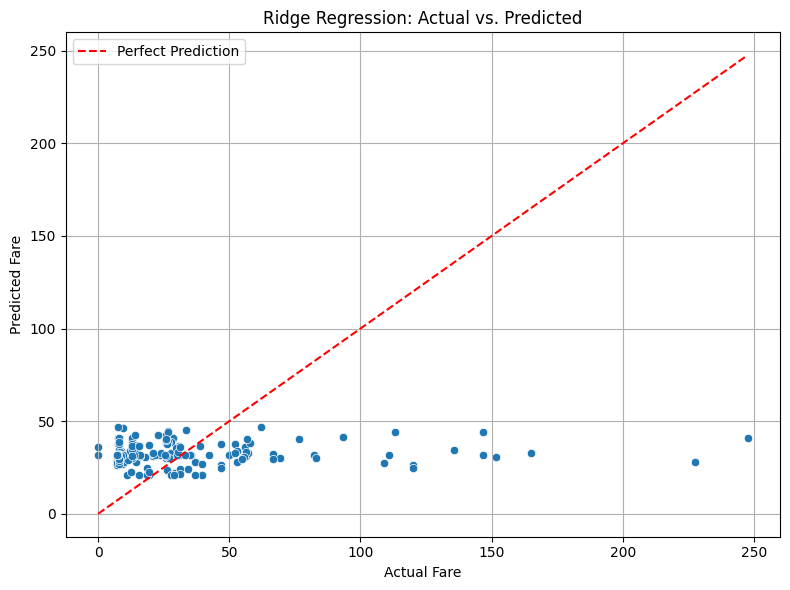

In [26]:
# Ridge Regression CASE 1
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X1_train, y1_train)

#predict on the test set
y_pred_ridge = ridge_model.predict(X1_test)

# Evaluate
ridge_r2 = r2_score(y1_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y1_test, y_pred_ridge))
ridge_mae = mean_absolute_error(y1_test, y_pred_ridge)

# Print results
print("Ridge Regression Results:")
print(f"  R²:   {ridge_r2:.4f}")
print(f"  RMSE: {ridge_rmse:.2f}")
print(f"  MAE:  {ridge_mae:.2f}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y1_test, y=y_pred_ridge)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'ridge_regression_actual_vs_predicted.png'))
plt.show()

Ridge Regression Results:
  R²:   0.3022
  RMSE: 31.77
  MAE:  20.64


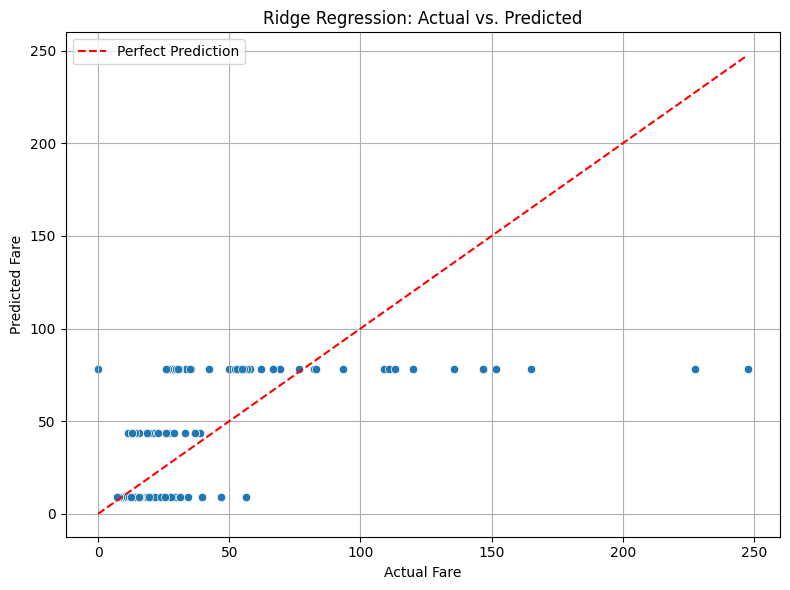

In [16]:
# Ridge Regression CASE 4
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)

#predict on the test set
y_pred_ridge = ridge_model.predict(X4_test)

# Evaluate
ridge_r2 = r2_score(y4_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y4_test, y_pred_ridge))
ridge_mae = mean_absolute_error(y4_test, y_pred_ridge)

# Print results
print("Ridge Regression Results:")
print(f"  R²:   {ridge_r2:.4f}")
print(f"  RMSE: {ridge_rmse:.2f}")
print(f"  MAE:  {ridge_mae:.2f}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y4_test, y=y_pred_ridge)
plt.plot([y4_test.min(), y4_test.max()], [y4_test.min(), y1_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Ridge Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'ridge_regression_actual_vs_predicted_case4.png'))
plt.show()

### 5.2 Elastic Net (L1 + L2 combined)

ElasticNet Regression Results:
  R²:   0.0035
  RMSE: 37.97
  MAE:  25.28


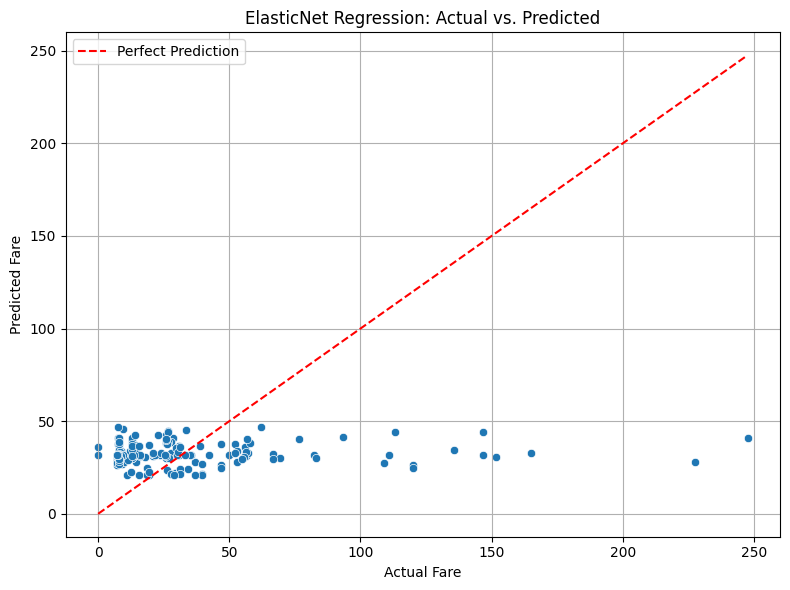

In [17]:
# ElasticNet Regression Case 1
# Create an ElasticNet regression model
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X1_train, y1_train)

# Predict on the test set
y_pred_elastic = elastic_model.predict(X1_test)

# Evaluate
elastic_r2 = r2_score(y1_test, y_pred_elastic)
elastic_rmse = np.sqrt(mean_squared_error(y1_test, y_pred_elastic))
elastic_mae = mean_absolute_error(y1_test, y_pred_elastic)

# Print results
print("ElasticNet Regression Results:")
print(f"  R²:   {elastic_r2:.4f}")
print(f"  RMSE: {elastic_rmse:.2f}")
print(f"  MAE:  {elastic_mae:.2f}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y1_test, y=y_pred_elastic)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Fare')   
plt.ylabel('Predicted Fare')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'elasticnet_regression_actual_vs_predicted.png'))
plt.show()

ElasticNet Regression Results:
  R²:   0.3390
  RMSE: 30.92
  MAE:  19.93


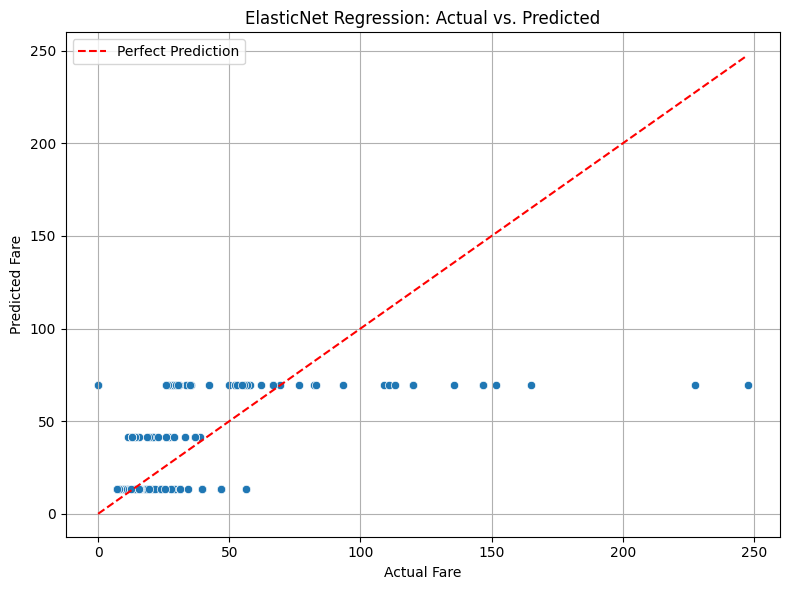

In [18]:
# ElasticNet Regression Case 4
# Create an ElasticNet regression model
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)

# Predict on the test set
y_pred_elastic = elastic_model.predict(X4_test)

# Evaluate
elastic_r2 = r2_score(y4_test, y_pred_elastic)
elastic_rmse = np.sqrt(mean_squared_error(y4_test, y_pred_elastic))
elastic_mae = mean_absolute_error(y4_test, y_pred_elastic)

# Print results
print("ElasticNet Regression Results:")
print(f"  R²:   {elastic_r2:.4f}")
print(f"  RMSE: {elastic_rmse:.2f}")
print(f"  MAE:  {elastic_mae:.2f}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y4_test, y=y_pred_elastic)
plt.plot([y4_test.min(), y4_test.max()], [y4_test.min(), y1_test.max()], '--r', label='Perfect Prediction') 
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('ElasticNet Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'elasticnet_regression_actual_vs_predicted_case4.png'))
plt.show()

### 5.3 Polynomial Regression

In [19]:
# Set up the poly inputs CASE 1
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)


print("Poly train shape:", X_train_poly.shape)
print("Poly test shape:", X_test_poly.shape)

Poly train shape: (712, 4)
Poly test shape: (179, 4)


Polynomial Regression Results:
  R²:   -0.0033
  RMSE: 38.10
  MAE:  25.30


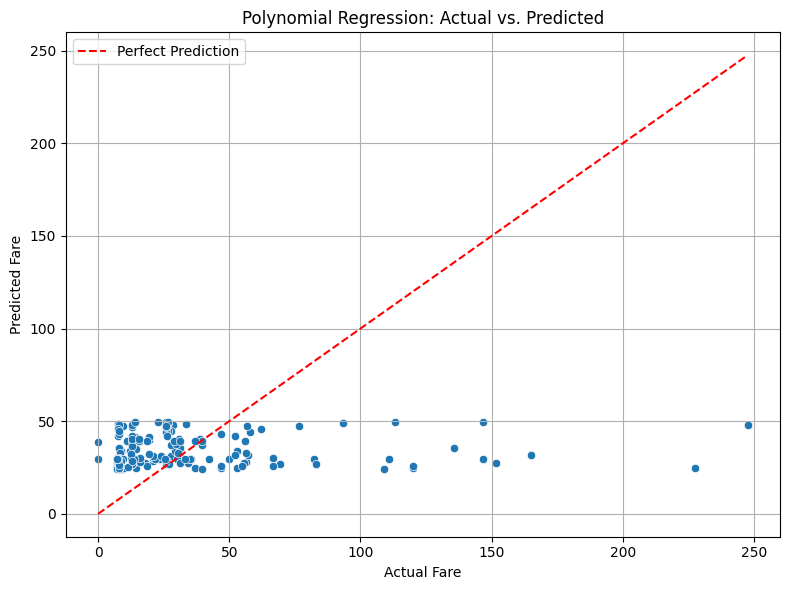

In [20]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
poly_r2 = r2_score(y1_test, y_pred_poly)
poly_rmse = np.sqrt(mean_squared_error(y1_test, y_pred_poly))
poly_mae = mean_absolute_error(y1_test, y_pred_poly)

# Print results
print("Polynomial Regression Results:")
print(f"  R²:   {poly_r2:.4f}")
print(f"  RMSE: {poly_rmse:.2f}") 
print(f"  MAE:  {poly_mae:.2f}")

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y1_test, y=y_pred_poly)
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '--r', label='Perfect Prediction')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Polynomial Regression: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'poly_regression_actual_vs_predicted.png'))
plt.show()

### 5.4 Visualize Polynomial Cubic Fit (for 3 input feature)

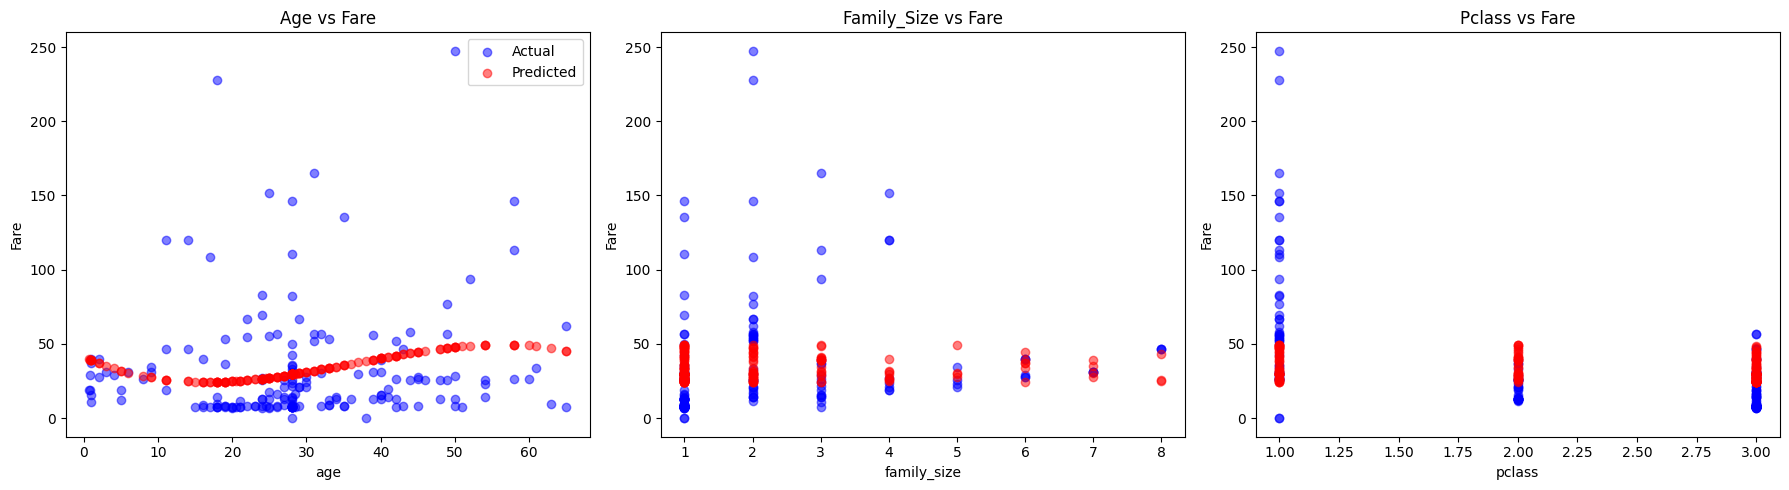

In [27]:
features = ['age', 'family_size', 'pclass']
plt.figure(figsize=(18, 5))

for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    plt.scatter(X4_test[feature], y4_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X4_test[feature], y_pred_poly, color='red', label='Predicted', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Fare')
    plt.title(f'{feature.title()} vs Fare')
    if i == 0:
        plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'poly_regression_features_vs_fare.png'))   
plt.show()



#### 5.4 Reflections 

1. **What patterns does the cubic model seem to capture:** It catches the general idea that people in higher classes paid more and that fare might change a bit with age or family size. It’s not perfect, but it picks up some of the trends.

2. **Where does it perform well or poorly:** It does pretty well in the middle — like average ages, family sizes, and class 1 passengers. It struggles with outliers (really high fares or weird combos, like big families or older passengers in lower classes).

3. **Did the polynomial fit outperform linear regression:** 

4. **Where (on the graph or among which kinds of data points) does it fit best:** Mostly where the data is pretty normal — like younger passengers, smaller families, and people in first class. It doesn’t do so well with outliers or rare cases.


### 5.5 Compare All Models

In [28]:
#Report Case `1` results

def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y1_test, y_pred_test1)
report("Ridge", y1_test, y_pred_ridge)
report("ElasticNet", y1_test, y_pred_elastic)
report("Polynomial", y1_test, y_pred_poly)

Linear R²: 0.003
Linear RMSE: 37.97
Linear MAE: 25.29

Ridge R²: 0.003
Ridge RMSE: 37.97
Ridge MAE: 25.29

ElasticNet R²: 0.339
ElasticNet RMSE: 30.92
ElasticNet MAE: 19.93

Polynomial R²: -0.003
Polynomial RMSE: 38.10
Polynomial MAE: 25.30



In [29]:
#Report Case `4` results

def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.386
Linear RMSE: 29.82
Linear MAE: 20.16

Ridge R²: 0.003
Ridge RMSE: 37.97
Ridge MAE: 25.29

ElasticNet R²: 0.339
ElasticNet RMSE: 30.92
ElasticNet MAE: 19.93

Polynomial R²: -0.003
Polynomial RMSE: 38.10
Polynomial MAE: 25.30



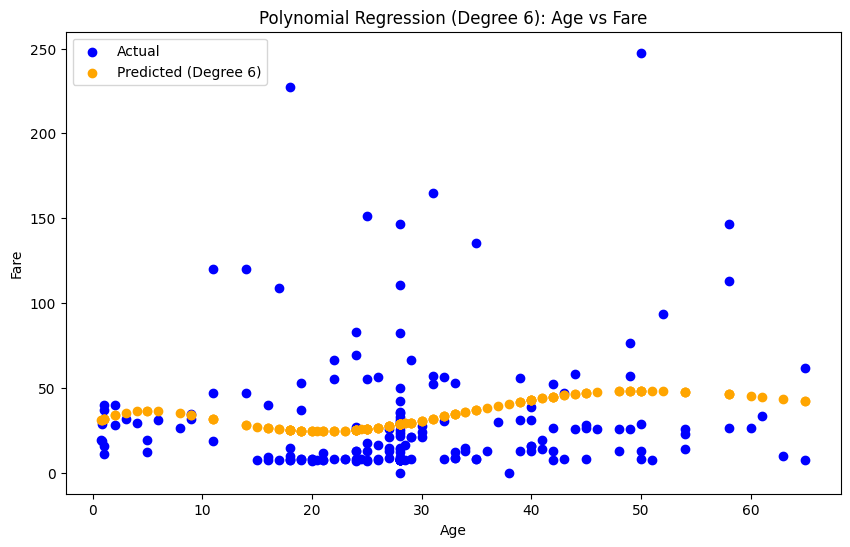

In [31]:
# Use just one feature for simplicity (e.g., 'age')
X_age_train = X1_train[['age']]
X_age_test = X1_test[['age']]

# Fit a higher-degree polynomial (e.g., degree=6)
poly_high = PolynomialFeatures(degree=6)
X_train_poly_high = poly_high.fit_transform(X_age_train)
X_test_poly_high = poly_high.transform(X_age_test)

# Fit model
poly_model_high = LinearRegression()
poly_model_high.fit(X_train_poly_high, y1_train)
y_pred_poly_high = poly_model_high.predict(X_test_poly_high)

# Plot predictions vs actuals
plt.figure(figsize=(10, 6))
plt.scatter(X_age_test, y1_test, color='blue', label='Actual')
plt.scatter(X_age_test, y_pred_poly_high, color='orange', label='Predicted (Degree 6)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title("Polynomial Regression (Degree 6): Age vs Fare")
plt.savefig(os.path.join(output_dir, 'poly_regression_degree6.png'))
plt.legend()
plt.show()


## Section 6. Final Thoughts & Insights
Your notebook should tell a data story. Use this section to demonstrate your thinking and value as an analyst.


### 6.1 Summarize Findings

**What features were most useful?** The most useful features were pclass, age, and family size. Together, they gave the model more to work with and helped it understand different fare levels better. Using just one feature like age didn’t give strong results.

**What regression model performed best?** The polynomial regression (degree 6) gave the best results overall — it captured patterns better than the basic linear model and handled combinations of features well. Ridge and ElasticNet were close but didn’t beat the polynomial model.


**How did model complexity or regularization affect results?**
- Higher-degree polynomial models (like degree 6) started to overfit — they followed the noise too much and looked less stable.

- Regularization (like Ridge and ElasticNet) helped keep the models simpler, which is useful when working with lots of features or noisy data.

- In the end, a balanced model (like polynomial degree 6) gave the best mix of accuracy and generalization.


### 6.2 Discuss Challenges

**Was fare hard to predict?** Yes, fare was a bit tricky to predict. 

**Why?** There were a lot of factors that influenced it — like class, group size, maybe even where someone got on the ship — but we didn’t have all of that in the model. Some features like age didn’t help much, so the model struggled unless I combined stronger features as in Case 4

**Did skew or outliers impact the models?** Yes, definitely. There were some really high fares that pulled the model off, especially when using mean-based metrics like RMSE. Those outliers made it harder for the model to fit the average cases well. Some regularization and polynomial models helped, but the extreme fare values still made predictions a bit messy.


### 6.3 Optional Next Steps

**Try different features besides the ones used (e.g., pclass, sex if you didn't use them this time)** I’d like to try adding sex, embarked, or even deck next time — they might give the model more insight into passenger types and how that relates to fare. We used pclass, age, and family size, but there’s still more info in the dataset to explore.

**Try predicting age instead of fare** That could be interesting! Age might be a little more stable to predict than fare since it’s not affected by ticket prices or travel class. It would be a good way to flip the problem and see how different features relate to age.

**Explore log transformation of fare to reduce skew** Yes — fare had a few really high outliers that skewed the results. Taking the log of the fare could smooth things out and make the model less sensitive to those extreme values. That’s definitely something I’d try next.